# Plot history

In this file, we are going to plot the results of our simulation.

We will perform the following actions:
* Plot the real values of the PDE function
* Plot the estimated PDE values generated using Monte Carlo simulation

Please run the following codes:

## Table of Content

- [1 - Packages](#1)
- [2 - Plotting the results of our simulation](#2)
    - [2.1 - Load the relevant csv files](#2-1)
    - [2.2 - Plot the PDE in one dimension: fix x in {2, 3, ..., 10} and varies t within [0, x-1]](#2-2)

<a name='1'></a>
## 1 - Packages

Run the cell below to import all the libraries you'll need:

In [8]:
# From system
import os
import shutil
from pathlib import Path
import random

# Data structure
import numpy as np
import pandas as pd
import json
import csv

# Plotting graph
from matplotlib import pyplot as plt

<a name='2'></a>
## 2 - Plotting the results of our simulation

<a name='2-1'></a>
### 2.1 - Load the relevant csv files

In [60]:
np_dictionary = {}

dir_name = "output"
os_listdir = os.listdir(dir_name)
for file_name in os_listdir:
    file_path = os.path.join(dir_name, file_name)
    data =  pd.read_csv(file_path, delimiter=',', dtype=None, header=None)
    np_dictionary[file_name[:-4]] = data

<a name='2-3'></a>
### 2.2 - Plot the PDE in one dimension: fix x=-1 and varies t within [0, 2]

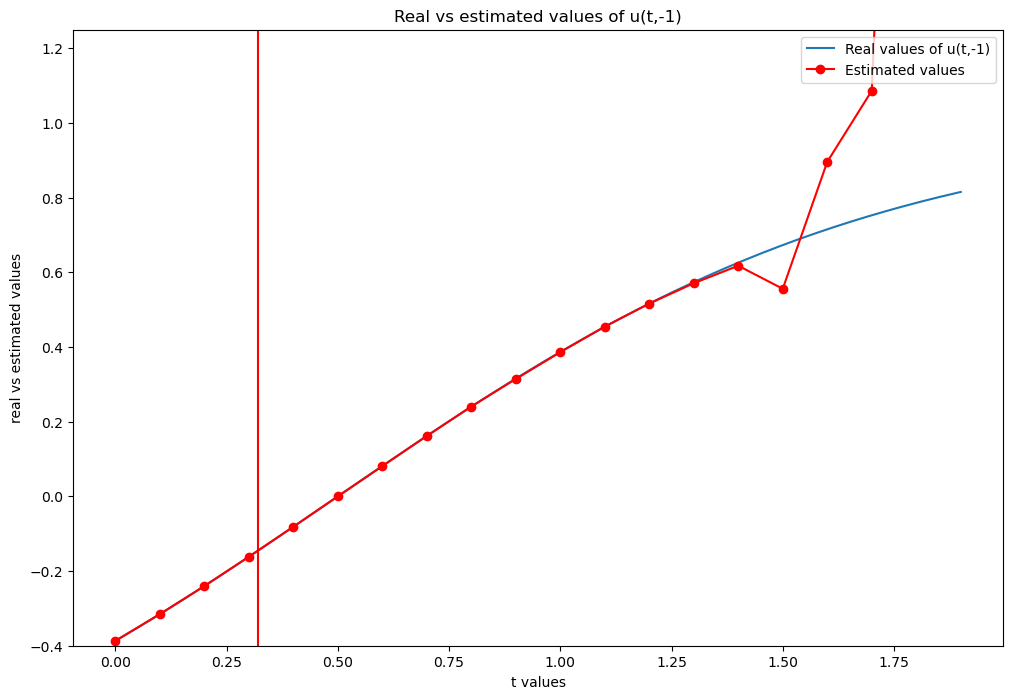

In [61]:
impose_ylim = True
y_lim = [-0.4,1.25]

real_values = np.asarray(np_dictionary["analytic"])
real_values = np.reshape(real_values, (301,))[0:191]
t_values = np.arange(0, 1.91, 0.01)
estimated_values = np.asarray(np_dictionary["monte_carlo"])
estimated_values = np.reshape(estimated_values, (31,))[0:19]
t_estimated = np.arange(0, 1.9, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, real_values, label='Real values of u(t,-1)')
plt.plot(t_estimated, estimated_values, 'ro-', label='Estimated values')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('t values')
plt.axvline(x=0.32,color='red')

plt.title('Real vs estimated values of u(t,-1)')
plt.legend(loc='upper right')
plt.show()

In [62]:
import math

# def sech(x):
#     return 2 / (math.exp(x) + math.exp(-x))

T_vector = [i/100 for i in range(101)]
bound = []
lambda_ = 0.25
for T in T_vector:
    # estimated_bound = pow(max(3/2*math.tanh(-(1+T)/math.sqrt(6)), math.sqrt(6)*T*pow(sech((T-1)/math.sqrt(6)), 2)), 2) * ( 2 * T / lambda_) * math.exp(2*lambda_*T) * (1-math.exp(-2*lambda_*T))
    estimated_bound = pow(max(3/2, math.sqrt(6)*T), 2) * ( 2 * T / lambda_) * math.exp(2*lambda_*T) * (1-math.exp(-2*lambda_*T))
    bound.append(estimated_bound)

bound_print = [(i/100, bound[i]) for i in range(101)]
print(bound_print)

[(0.0, 0.0), (0.01, 0.00090225375469219), (0.02, 0.003618060150300481), (0.03, 0.008161054892488256), (0.04, 0.014544964819264218), (0.05, 0.02278360847198601), (0.06, 0.032890896669798234), (0.07, 0.04488083308752534), (0.08, 0.05876751483703909), (0.09, 0.07456513305212135), (0.1, 0.09228797347684327), (0.11, 0.11195041705747878), (0.12, 0.13356694053797677), (0.13, 0.15715211705901075), (0.14, 0.18272061676062545), (0.15, 0.21028720738850523), (0.16, 0.23986675490388074), (0.17, 0.2714742240970999), (0.18, 0.30512467920488157), (0.19, 0.34083328453127204), (0.2, 0.3786153050723317), (0.21, 0.41848610714456574), (0.22, 0.4604611590171305), (0.23, 0.504556031547825), (0.24, 0.5507863988229031), (0.25, 0.5991680388007182), (0.26, 0.6497168339592303), (0.27, 0.7024487719473886), (0.28, 0.7573799462404254), (0.29, 0.8145265567990727), (0.3, 0.8739049107327288), (0.31, 0.9355314229665981), (0.32, 0.999422616912827), (0.33, 1.06559512514566), (0.34, 1.1340656900806367), (0.35, 1.2048511646

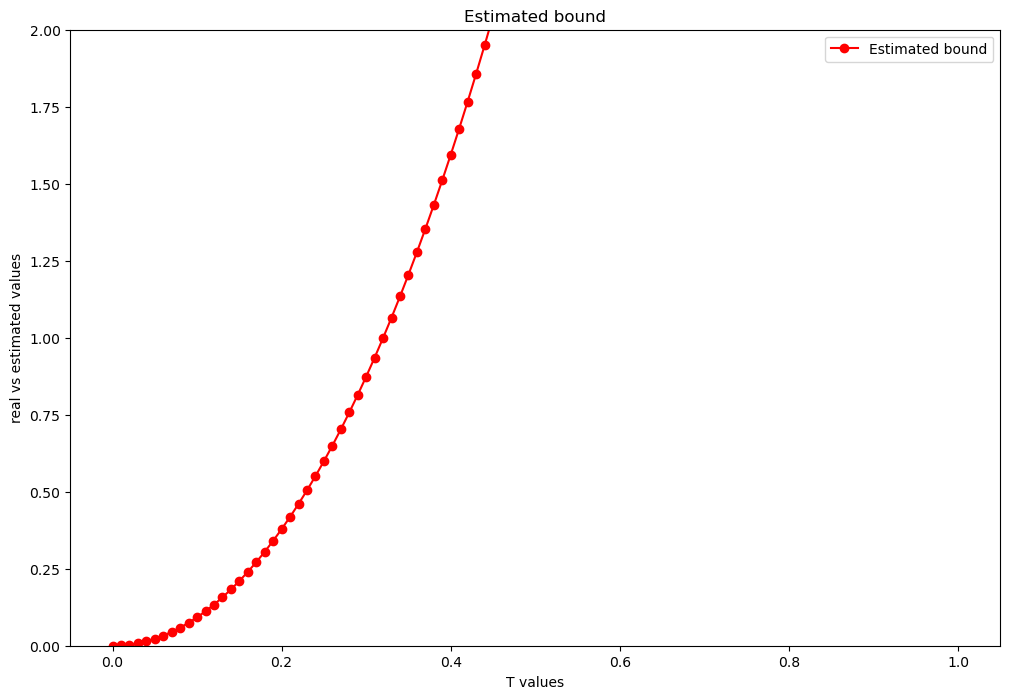

In [63]:
impose_ylim = True
y_lim = [0,2]

plt.figure(figsize=(12, 8))
plt.plot(T_vector, bound, 'ro-', label='Estimated bound')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('T values')
# plt.axvline(x=30,color='red')

plt.title('Estimated bound')
plt.legend(loc='upper right')
plt.show()